# Logistic Regression- Diabetes

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

To predict patient is having diabetes or not by using required paramteres

Glucose	
BloodPressure	
SkinThickness	
Insulin	
BMI	
DiabetesPedigreeFunction	
Age	


## 2. Data Gathering

In [2]:
df_diab = pd.read_csv('diabetes.csv')
df_diab

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure        

## 3. EDA

### 3.1 Glucose

<AxesSubplot: >

<AxesSubplot: >

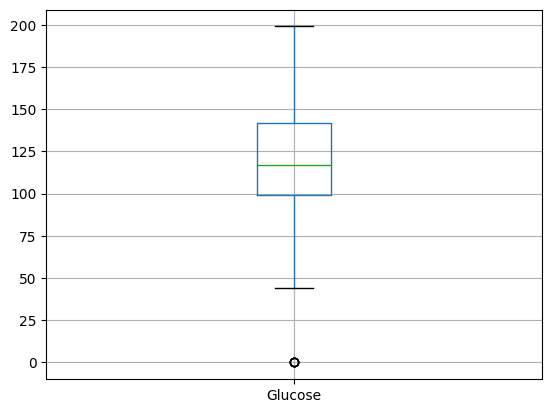

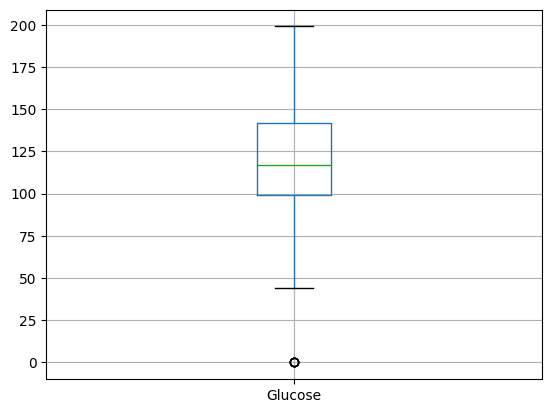

In [4]:
df_diab[['Glucose']].boxplot()

<AxesSubplot: xlabel='Glucose'>

<AxesSubplot: xlabel='Glucose'>

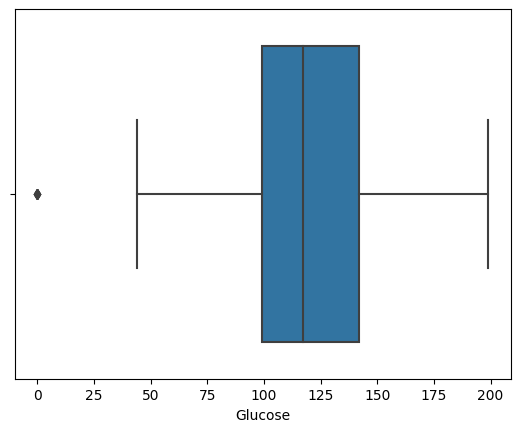

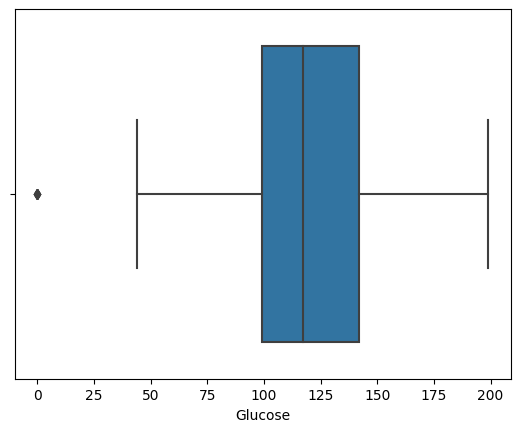

In [5]:
import matplotlib
%matplotlib inline
sns.boxplot(x = df_diab['Glucose'])

In [6]:
df_diab['Glucose'] = np.where(df_diab['Glucose']< 25, df_diab['Glucose'].median(), df_diab.Glucose)

### 3.2 BloodPressure

<AxesSubplot: >

<AxesSubplot: >

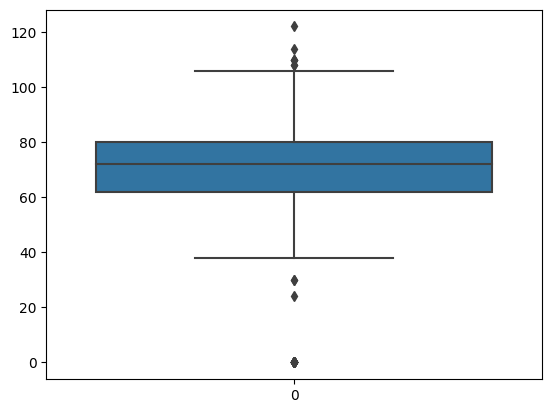

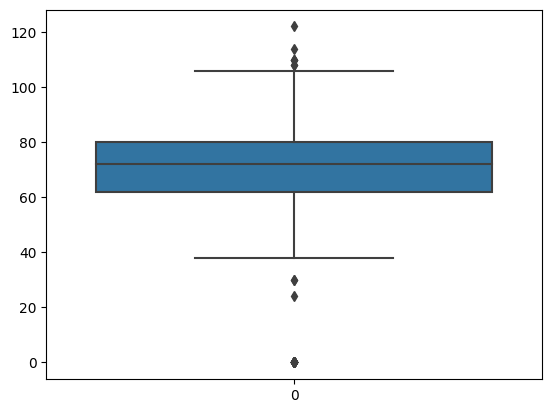

In [7]:
sns.boxplot(df_diab['BloodPressure'])

In [8]:
df_diab[~df_diab['BloodPressure'].between(35,110)].shape

(40, 8)

(40, 8)

In [9]:
df_diab['BloodPressure'] = np.where(~df_diab['BloodPressure'].between(35,110), df_diab['BloodPressure'].median(),
                                   df_diab['BloodPressure'])

<AxesSubplot: >

<AxesSubplot: >

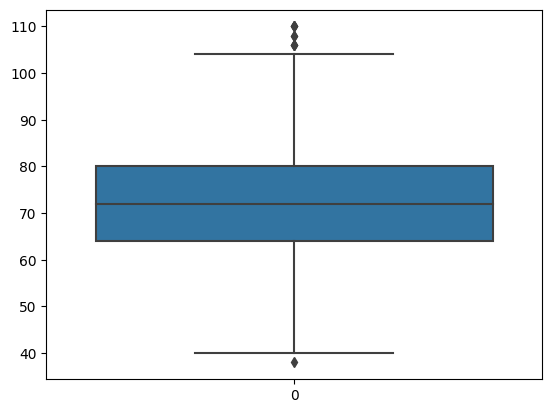

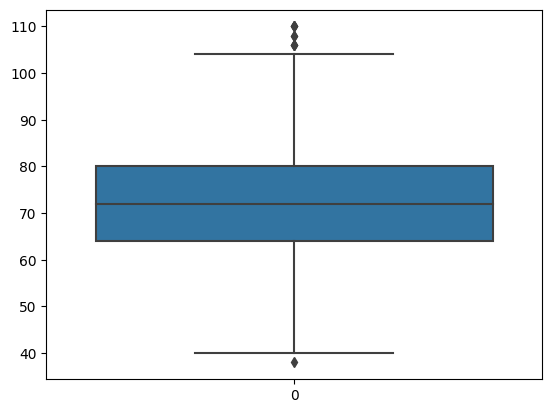

In [10]:
sns.boxplot(df_diab['BloodPressure'])

### 3.3 SkinThickness

<AxesSubplot: >

<AxesSubplot: >

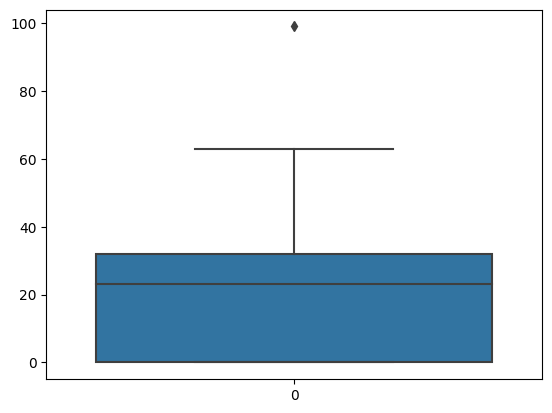

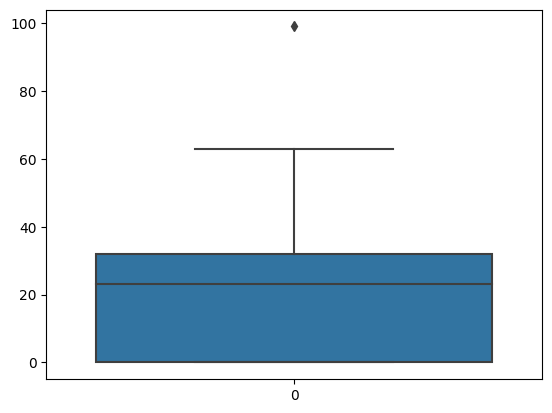

In [11]:
sns.boxplot(df_diab['SkinThickness'])

In [12]:
df_diab['SkinThickness'] = np.where(df_diab['SkinThickness']>95, df_diab['SkinThickness'].median(), df_diab['SkinThickness'])

### 3.4 Insulin

<AxesSubplot: >

<AxesSubplot: >

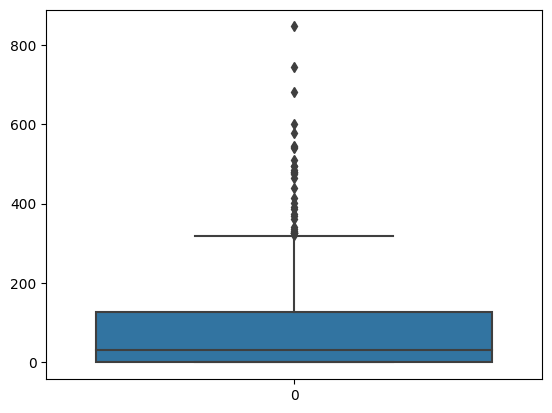

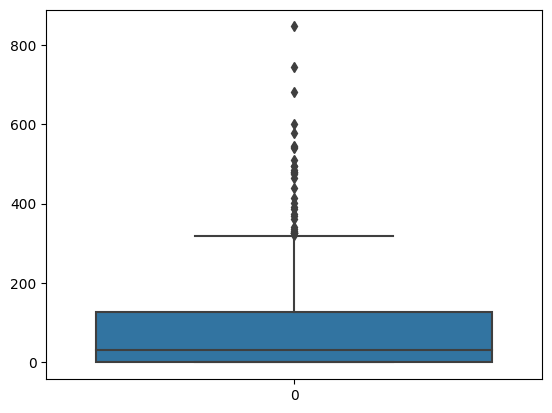

In [13]:
sns.boxplot(df_diab['Insulin'])

In [14]:
df_diab[df_diab['Insulin']>=320].shape

(34, 8)

(34, 8)

In [15]:
df_diab['Insulin'] = np.where(df_diab['Insulin']>=320, df_diab['Insulin'].median(), df_diab['Insulin'])

### 3.5 BMI

<AxesSubplot: >

<AxesSubplot: >

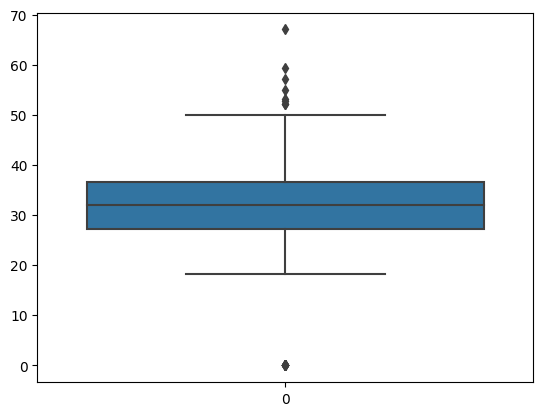

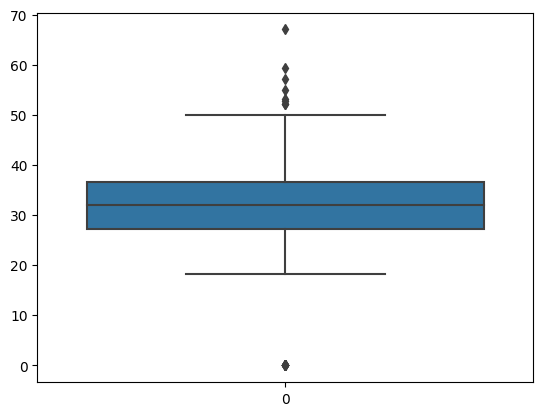

In [16]:
sns.boxplot(df_diab['BMI'])

In [17]:
df_diab['BMI'] = np.where(~df_diab['BMI'].between(15,50), df_diab['BMI'].median(),
                                   df_diab['BMI'])

### 3.6 DiabetesPedigreeFunction

<AxesSubplot: >

<AxesSubplot: >

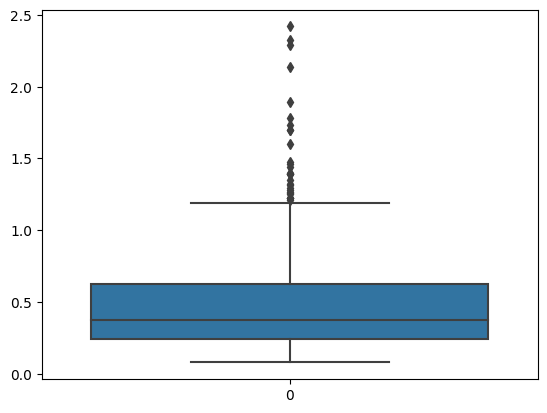

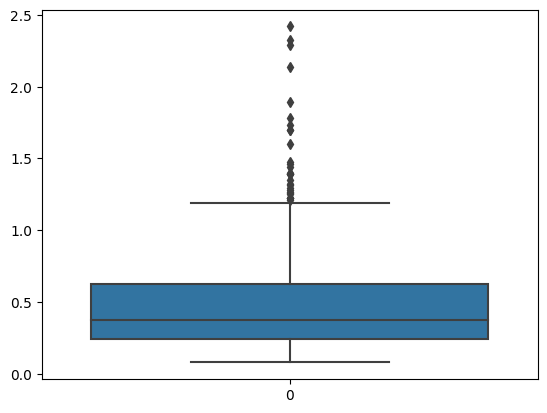

In [18]:
sns.boxplot(df_diab['DiabetesPedigreeFunction'])

In [19]:
df_diab[df_diab['DiabetesPedigreeFunction']>=1.2].shape

(29, 8)

(29, 8)

In [20]:
df_diab['DiabetesPedigreeFunction'] = np.where(df_diab['DiabetesPedigreeFunction']>=1.2, df_diab['DiabetesPedigreeFunction'].median(), df_diab['DiabetesPedigreeFunction'])

### 3.7 Age

<AxesSubplot: >

<AxesSubplot: >

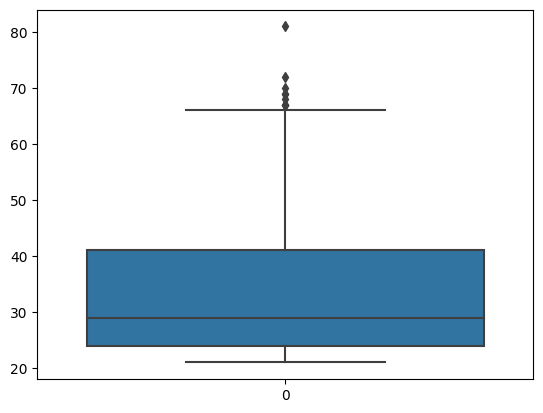

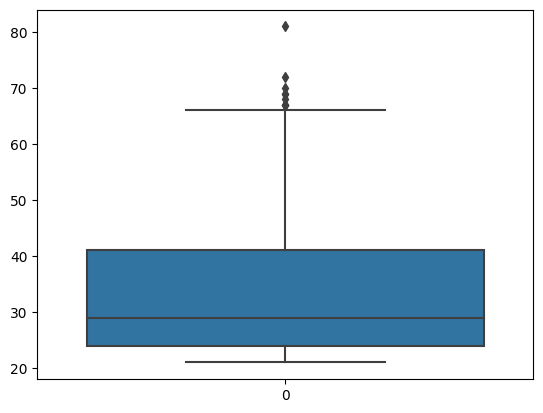

In [21]:
sns.boxplot(df_diab['Age'])

In [22]:
df_diab['Age'] = np.where(df_diab['Age']>=66, df_diab['Age'].median(), df_diab['Age'])

## 4. Feature Engineering

## 5. Feature Selection

#### VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
x = df_diab.drop('Outcome', axis=1)
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.6270,50.0
1,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
2,183.0,64.0,0.0,0.0,23.3,0.6720,52.0
3,150.0,66.0,23.0,94.0,28.1,0.1670,21.0
4,150.0,40.0,35.0,168.0,43.1,0.3725,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.1710,63.0
764,122.0,70.0,27.0,0.0,36.8,0.3400,27.0
765,121.0,72.0,23.0,112.0,26.2,0.2450,30.0
766,126.0,60.0,0.0,0.0,30.1,0.3490,47.0


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,50.0,35.0,0.0,33.6,0.6270,50.0
1,85.0,66.0,29.0,0.0,26.6,0.3510,31.0
2,183.0,64.0,0.0,0.0,23.3,0.6720,52.0
3,150.0,66.0,23.0,94.0,28.1,0.1670,21.0
4,150.0,40.0,35.0,168.0,43.1,0.3725,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.1710,63.0
764,122.0,70.0,27.0,0.0,36.8,0.3400,27.0
765,121.0,72.0,23.0,112.0,26.2,0.2450,30.0
766,126.0,60.0,0.0,0.0,30.1,0.3490,47.0


In [25]:
variance_inflation_factor(x.values, 1)

33.76936722140209

33.76936722140209

<AxesSubplot: >

<AxesSubplot: >

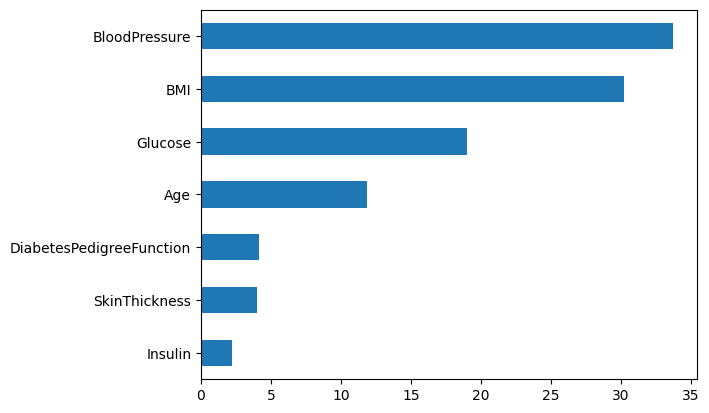

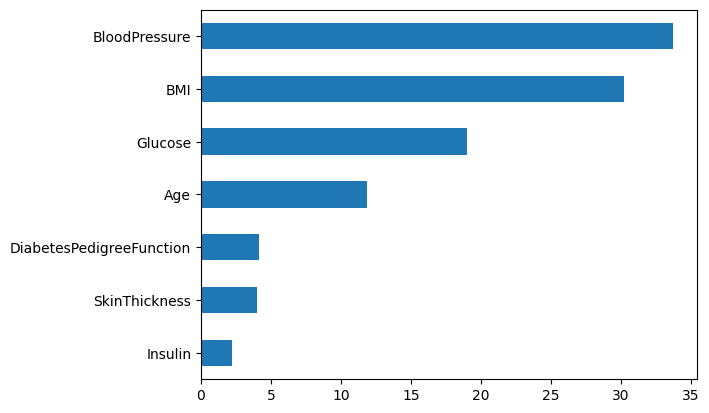

In [26]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind= 'barh')

In [27]:
df_diab.corr().tail(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.489446,0.166638,0.067344,0.078066,0.300615,0.151994,0.267032,1.0


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.489446,0.166638,0.067344,0.078066,0.300615,0.151994,0.267032,1.0


In [28]:
df_diab['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## 6. Model Training

### Train test Split

In [29]:
x = df_diab.drop('Outcome', axis=1)
y = df_diab['Outcome']


In [30]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [31]:
y.value_counts(normalize=False)

0    500
1    268
Name: Outcome, dtype: int64

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
268/500

0.536

0.536

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=2, stratify=y)

In [34]:
268*0.8

214.4

214.4

In [35]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

0    0.651466
1    0.348534
Name: Outcome, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

### Model instantiating

In [37]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

LogisticRegression()

## Evaluation

In [38]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act,pred)
    print('Accuracy Score:', acc_score)
    print('**'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confision Matrix: \n', cnf_matrix)
    print('**'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report :\n', clf_report)
    
    return pred
    
print('Testing Data Evaluation'.center(60, '*'))   
y_pred = evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score: 0.7532467532467533
****************************************
Confision Matrix: 
 [[89 11]
 [27 27]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

******************Testing Data Evaluation*******************
Accuracy Score: 0.7532467532467533
****************************************
Confision Matrix: 
 [[89 11]
 [27 27]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy             

0 >> neg
1 >> pos

In [39]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

0    100
1     54
Name: Outcome, dtype: int64

In [40]:
print('Testing Data Evaluation'.center(60, '*'))   
evaluate_model(log_clf, x_test, y_test)

******************Testing Data Evaluation*******************
Accuracy Score: 0.7532467532467533
****************************************
Confision Matrix: 
 [[89 11]
 [27 27]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

******************Testing Data Evaluation*******************
Accuracy Score: 0.7532467532467533
****************************************
Confision Matrix: 
 [[89 11]
 [27 27]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy             

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [41]:
print('Training Data Evaluation'.center(60, '*'))   
evaluate_model(log_clf, x_train, y_train)

******************Training Data Evaluation******************
Accuracy Score: 0.7801302931596091
****************************************
Confision Matrix: 
 [[350  50]
 [ 85 129]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       400
           1       0.72      0.60      0.66       214

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614



array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

******************Training Data Evaluation******************
Accuracy Score: 0.7801302931596091
****************************************
Confision Matrix: 
 [[350  50]
 [ 85 129]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       400
           1       0.72      0.60      0.66       214

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.75       614
weighted avg       0.78      0.78      0.77       614



array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [42]:
y_pred[:10]

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
import pickle

In [45]:
with open('Log_model.pkl', 'wb') as f:
    pickle.dump(log_clf, f)